In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Sample data
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32).view(-1, 1)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32).view(-1, 1)

# Define a simple linear model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
for epoch in range(100):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Predict
print(model(torch.tensor([5.0]).view(-1, 1)))


tensor([[9.1192]], grad_fn=<AddmmBackward0>)


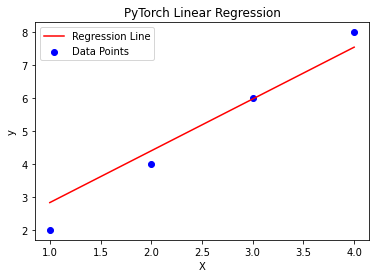

In [3]:
# Predict
with torch.no_grad():
    predictions = model(X).numpy()
import matplotlib.pyplot as plt
# Plot
plt.scatter(X.numpy(), y.numpy(), color='blue', label='Data Points')
plt.plot(X.numpy(), predictions, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('PyTorch Linear Regression')
plt.show()

In [4]:
#Example where Pytorch is simpler

In [6]:
import time
start_time = time.time()
import torch
import torch.nn as nn
import torch.optim as optim

# Sample data
X = torch.tensor([[1.], [2.], [3.], [4.]])
y = 2 * X + 1

# Simple linear model
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Custom training loop
num_epochs = 100
loss_threshold = 0.1
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Dynamic data modification based on loss
    if loss.item() < loss_threshold:
        X *= 1.5

    # Print loss every 20 epochs
    if epoch % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Execution time: {elapsed_time:.2f} seconds")

Epoch [1/100], Loss: 14.4460
Epoch [21/100], Loss: 0.0728
Epoch [41/100], Loss: 201109552.0000
Epoch [61/100], Loss: 366648407546254733397196800.0000
Epoch [81/100], Loss: inf
Execution time: 0.03 seconds
